In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

clicksDF = pd.read_csv('data/clicks.csv.gzip', compression='gzip', dtype={'advertiser_id':'int32','action_id':'float32','source_id':'int32','country_code':'category',\
                                                                           'latitude':'float32','longitude':'float32','carrier_id':'float32','os_minor':'category',\
                                                                           'os_major':'category','specs_brand':'category','timeToClick':'float32','touchX':'float32',\
                                                                           'touchY':'float32','ref_type':'category'}, index_col='trans_id')
clicksDF['created'] = pd.to_datetime(clicksDF['created'])
eventsDF = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory=False, dtype={'event_id':'int32','ref_type':'category','application_id':'int32',\
                                                                                            'attributed':'bool','device_countrycode':'category','device_city':'category',\
                                                                                            'trans_id':'category','carrier':'category','device_os':'category',\
                                                                                            'connection_type':'category'})
eventsDF['date'] = pd.to_datetime(eventsDF['date'])
eventsDF['wifi'].astype('bool', inplace=True)
installsDF = pd.read_csv('data/installs.csv.gzip', compression='gzip',index_col='ref_hash', dtype={'ref_type':'category','application_id':'int32',\
                                                                                              'device_brand':'category','click_hash':'float32'\
                                                                                            })
installsDF.drop(columns=['session_user_agent'], inplace=True)
installsDF['wifi'].astype('bool', inplace=True)
installsDF['created'] = pd.to_datetime(installsDF['created'])
auctionsDF = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, dtype={'country':'category','platform':'category','ref_type_id':'category'})

auctionsDF['date'] = pd.to_datetime(auctionsDF['date'])

print('setup done')

setup done


In [3]:
auctionsDF.dtypes

auction_type_id           float64
country                  category
date               datetime64[ns]
device_id                   int64
platform                 category
ref_type_id              category
source_id                   int64
dtype: object

In [4]:
auctionsDF.head(5)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
clicksDF.head(5).T

trans_id,iGgClCM9exiHF4K31g94XmvHEBSLKIY,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,X5XTOcYQovkl6yadYdAD7xioVGU9jiY
advertiser_id,2,0,0,2,2
action_id,NaN,NaN,NaN,NaN,NaN
source_id,4,0,0,3,3
created,2019-03-06 22:42:12.755000+00:00,2019-03-08 10:24:30.641000+00:00,2019-03-08 15:24:16.069000+00:00,2019-03-06 03:08:51.543000+00:00,2019-03-06 03:32:55.570000+00:00
country_code,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
latitude,1.20569,1.21892,1.20569,1.20569,1.20569
longitude,1.07023,1.07121,1.07023,1.07023,1.07023
wifi_connection,False,False,False,False,False
carrier_id,1,4,6,45,45
os_minor,6.768137412412545e+18,3.025219449024123e+18,5.97565607170903e+18,6.768137412412545e+18,6.768137412412545e+18


In [6]:
display(installsDF.head(5).T)

ref_hash,8464844987297247076,3250564871270161533,7953318831018100268,7953318831018100268,8355110941557237501
created,2019-03-13 01:43:33.445000,2019-03-13 04:58:35.078000,2019-03-13 04:20:57.666000,2019-03-13 04:20:57.698000,2019-03-10 22:24:56.684000
application_id,0,0,0,0,0
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
click_hash,NaN,NaN,NaN,NaN,NaN
attributed,False,False,False,False,False
implicit,False,False,True,False,True
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_brand,3.083058605577787e+17,3.083058605577787e+17,5.1379920467642125e+17,5.1379920467642125e+17,1.083368711068078e+18
device_model,4.44525e+18,4.44525e+18,6.02654e+18,6.02654e+18,7.87661e+18
user_agent,NaN,NaN,NaN,NaN,NaN


In [7]:
display(eventsDF.head(5).T)

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18


In [8]:
auctionsDF['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [9]:
target_competenciaDF.head(5)

,ref_hash,obj_Sc,obj_St
index,,,
0,137898135704568768,0,0
1,150879151115867648,0,0
2,151413055298024576,0,0
3,151646640932198912,0,0
4,200770436957651680,0,0


### Events
Before datatypes: 402 MB

In [10]:
difference = eventsDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)), 'MB')
difference = 421557567-difference
print('Difference:', int(round(difference/1024/1024)), 'MB')

After datatypes: 269 MB
Difference: 133 MB


### Clicks
Before dtypes: 4 MB

In [11]:
difference = clicksDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)),'MB')
difference = 4031783-difference
print('Difference:', int(round(difference/1024/1024)),'MB')


After datatypes: 2 MB
Difference: 2 MB


### Auctions
Before dtypes: 1045 MB

In [12]:
difference = auctionsDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)),'MB')
difference = 1095993944-difference
print('Difference:', int(round(difference/1024/1024)),'MB')


After datatypes: 653 MB
Difference: 392 MB


In [13]:
clicksDF.head(10)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
trans_id,,,,,,,,,,,,,,,,,,,
iGgClCM9exiHF4K31g94XmvHEBSLKIY,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563000,0.905,0.078,1891515180541284343,1904083516767779093
MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013000,0.035,0.431,1891515180541284343,4368617728156436525
X5XTOcYQovkl6yadYdAD7xioVGU9jiY,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.110001,0.054,0.423,1891515180541284343,4368617728156436525
dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,5,NaN,4,2019-03-07 18:02:25.833000+00:00,6333597102633388268,1.209638,1.064208,False,27.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,1.0,NaN,0.606,0.459,1891515180541284343,7925959310979071406
cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,3,NaN,1,2019-03-12 15:17:04.453000+00:00,6333597102633388268,1.209638,1.064208,False,27.0,3.3786399484966047e+18,3.032809e+17,4.566453911975694e+18,2733035977666442898,1.0,NaN,NaN,NaN,1891515180541284343,1709687652740629839
MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,1,NaN,2,2019-03-06 19:15:47.249000+00:00,6333597102633388268,1.205393,1.077238,False,NaN,NaN,NaN,NaN,8930605132947907029,NaN,NaN,NaN,NaN,1891515180541284343,2127839020694198991
1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,3,NaN,0,2019-03-07 23:11:01.934000+00:00,6333597102633388268,1.205058,1.077332,False,19.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,3.129000,0.889,0.977,1891515180541284343,5073558237453939035


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import folium


clicksDF['touchY_log'] = np.log(clicksDF['touchY'].dropna()+1)
clicksDF['timeToClick_log'] = np.log(clicksDF['timeToClick'].dropna()+1)

In [15]:
major0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['os_major'].value_counts().index[0]
brand0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['brand'].value_counts().index[0]
specs_brand0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['specs_brand'].value_counts().index[0]
specs_brand0

'392184377613098015'

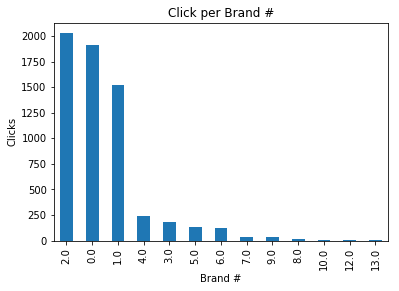

In [223]:
ax = clicksDF['brand'].value_counts().plot.bar();
ax.set_xlabel('Brand #');
ax.set_ylabel('Clicks');
ax.set_title('Click per Brand #');

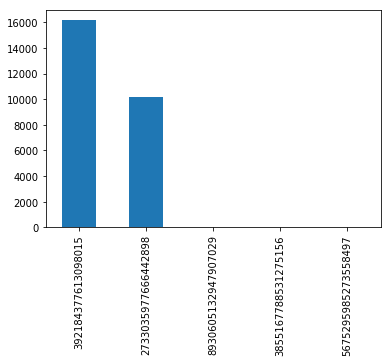

In [139]:
clicksDF['specs_brand'].value_counts().plot.bar();

In [17]:
brands_group = clicksDF.groupby(['specs_brand','brand']).size().reset_index().rename(columns={0:'total'})
display(brands_group)

,specs_brand,brand,total
0,2733035977666442898,0.0,1831
1,2733035977666442898,1.0,620
2,2733035977666442898,2.0,391
3,2733035977666442898,3.0,32
4,2733035977666442898,4.0,98
5,2733035977666442898,5.0,48
6,2733035977666442898,6.0,57
7,2733035977666442898,7.0,10
8,2733035977666442898,8.0,3
9,2733035977666442898,9.0,31


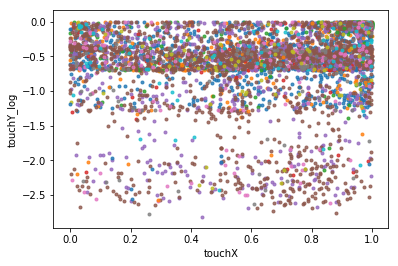

In [167]:

for i in range(0,len(brands_group)):
    sns.regplot(x=clicksDF.loc[(clicksDF['specs_brand']==brands_group.iloc[i]['specs_brand']) & (clicksDF['brand']==brands_group.iloc[i]['brand']), ["touchX","touchY_log"]].dropna()["touchX"], \
            y=-clicksDF.loc[(clicksDF['specs_brand']==brands_group.iloc[i]['specs_brand']) & (clicksDF['brand']==brands_group.iloc[i]['brand']), ["touchX","touchY_log"]].dropna()["touchY_log"], marker='.',fit_reg=False);



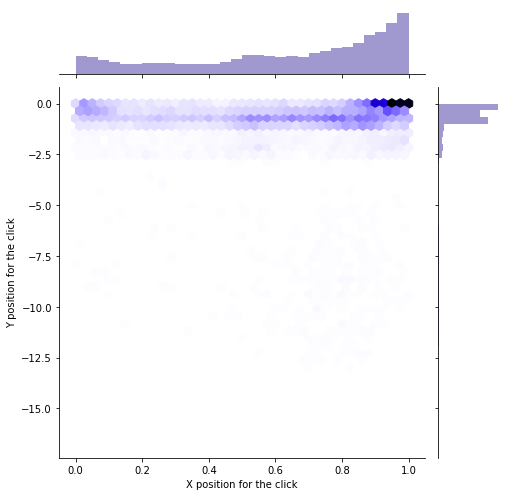

In [182]:
sns.jointplot(x=clicksDF[["touchX","touchY"]].dropna()["touchX"],y=-clicksDF[["touchX","touchY"]].dropna()["touchY"], \
              kind="hex",color='#110088', height=7).set_axis_labels('X position for the click', 'Y position for the click');

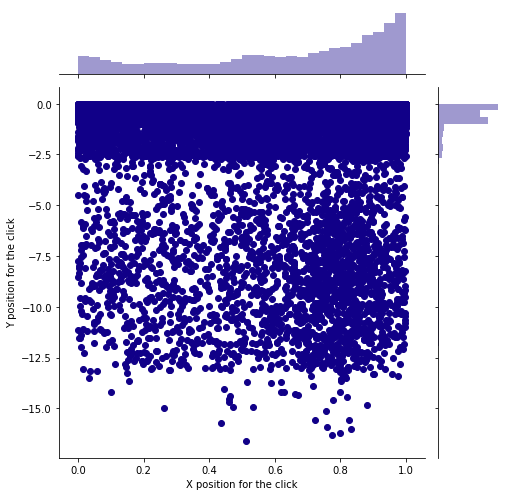

In [183]:
sns.jointplot(x=clicksDF[["touchX","touchY"]].dropna()["touchX"],y=-clicksDF[["touchX","touchY"]].dropna()["touchY"], \
              color='#110088', height=7).set_axis_labels('X position for the click', 'Y position for the click');

In [20]:
('#%02X%02X%02X' % (0,2,255))

'#0002FF'

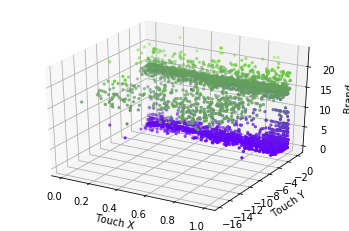

In [21]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def hex_color(i,tot):
    return ('#%02X%02X%02X' % (100,int(i*255/tot),int((tot-i)*255/tot)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tot = len(brands_group)

for i in range(0,tot):
    
    ax.scatter(clicksDF.loc[(clicksDF['specs_brand']==brands_group.iloc[i]['specs_brand']) & (clicksDF['brand']==brands_group.iloc[i]['brand'])]["touchX"],\
               -clicksDF.loc[(clicksDF['specs_brand']==brands_group.iloc[i]['specs_brand']) & (clicksDF['brand']==brands_group.iloc[i]['brand'])]["touchY"],
               i, c=hex_color(i,tot), marker='.')

ax.set_xlabel('Touch X')
ax.set_ylabel('Touch Y')
ax.set_zlabel('Brand')

plt.show()



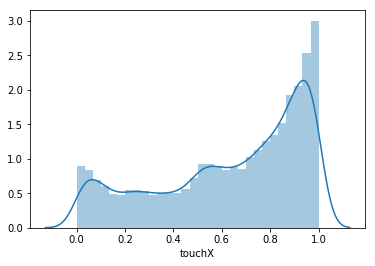

In [22]:
#clicksDF[["touchX","touchY"]].dropna()["touchX"]
sns.distplot(clicksDF[["touchX","touchY"]].dropna()["touchX"]);



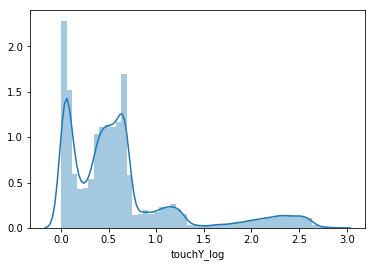

In [23]:
sns.distplot(clicksDF[["touchX","touchY_log"]].dropna()["touchY_log"]);

In [24]:
clicksDF.loc[clicksDF['specs_brand']=='8930605132947907029', ["touchX","touchY_log"]]

,touchX,touchY_log
trans_id,,
MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,NaN,NaN
dg_VX8Rt-2sSgam8DgfO16cj5syf3Gg,NaN,NaN
9d4llMoPQbuUzPZsuTuM_fMk2akkSk0,NaN,NaN
M6IYALEzxuxR6OdGVamy6xYtsXLl5lU,NaN,NaN
YvsQvLXxBz2toaiwnX7QqhOxRmKw400,NaN,NaN
faQwOu3qgxAsZcO9UXgD7l-g5anq8CU,NaN,NaN
HEjSx9RETolx0spYqaXKHVsb6vv82kw,NaN,NaN
2QAnNngWBWL8FQc-nekeDD3q9KMvDgE,NaN,NaN
guA32SPbDn2-zuiiD3fJqt9ZR8ri1jk,NaN,NaN


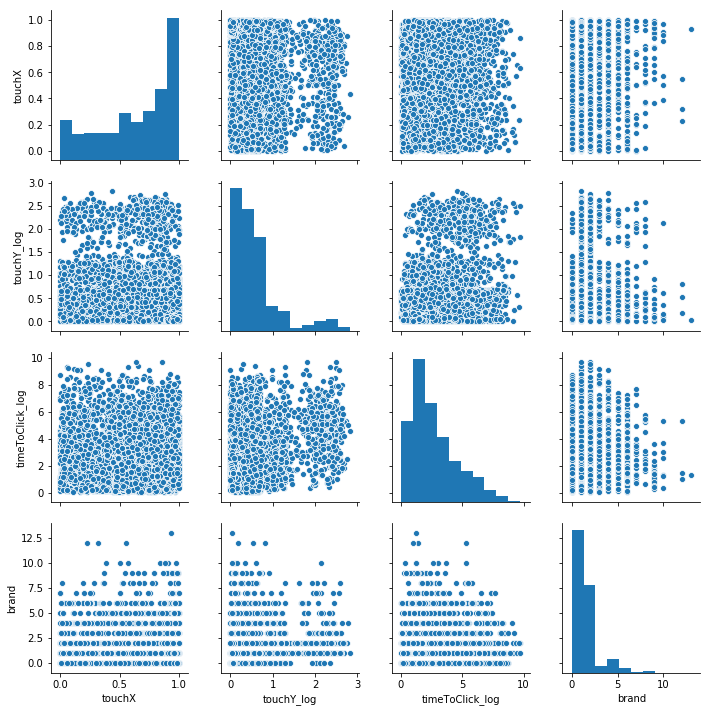

In [25]:
sns.pairplot(clicksDF.loc[:, ["touchX","touchY_log","timeToClick_log",'brand']].dropna());


In [26]:
clicksDF[["touchX","touchY_log",'specs_brand','os_major']].dropna()['os_major'].value_counts().index[0]

'3.072849339937028e+18'

In [27]:
clicksDF['longitude_tra'] = clicksDF['longitude'].apply(lambda x: (x*2)-36.75)
clicksDF['latitude_tra'] = clicksDF['latitude'].apply(lambda x: (x*2)-60.9)
data = clicksDF[['latitude','longitude','longitude_tra','latitude_tra']].dropna().drop_duplicates()

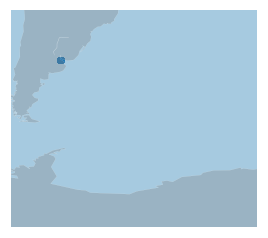

In [28]:
##### Set the dimension of the figure
my_dpi=96
#plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)



 
# Make the background map
m=Basemap(llcrnrlon=(data['longitude_tra'].min()-40), llcrnrlat=max((data['latitude_tra'].min()-40),-89),urcrnrlon=(data['longitude_tra'].max()+40),urcrnrlat=(data['latitude_tra'].max()+40))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['latitude_tra'], data['longitude_tra'], alpha=0.4, cmap="Set1")
 
# copyright and source data info
#plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 



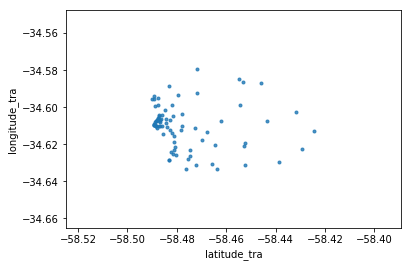

In [29]:
sns.regplot(y=data['longitude_tra'],x=data['latitude_tra'], marker='.',fit_reg=False);

In [30]:

clicksDF['longitude_tra'] = clicksDF['longitude'].apply(lambda x: (x*2)-36.75)
clicksDF['latitude_tra'] = clicksDF['latitude'].apply(lambda x: (x*2)-60.9)
data = clicksDF[['latitude','longitude','longitude_tra','latitude_tra']].dropna().drop_duplicates()

m = folium.Map(location=[-34.621210, -58.451066], zoom_start=13)

#folium.Circle(radius=100,location=[data['longitude_tra'].min(), data['latitude_tra'].min()],color='crimson',fill=False,).add_to(m)
#folium.Circle(radius=100,location=[data['longitude_tra'].min(), data['latitude_tra'].max()],color='crimson',fill=False,).add_to(m)
#folium.Circle(radius=100,location=[data['longitude_tra'].max(), data['latitude_tra'].min()],color='crimson',fill=False,).add_to(m)
#folium.Circle(radius=100,location=[data['longitude_tra'].max(), data['latitude_tra'].max()],color='crimson',fill=False,).add_to(m)

for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['longitude_tra'], data.iloc[i]['latitude_tra']],
      radius=100,
      color='crimson',
      fill=False
    ).add_to(m)

m

In [31]:
len(data)

82

In [32]:
data['longitude'].describe()

count    82.000000
mean      1.069901
std       0.005973
min       1.058204
25%       1.065683
50%       1.070199
75%       1.072619
max       1.085358
Name: longitude, dtype: float64

In [33]:
auct_click = pd.merge(auctionsDF, clicksDF, how='inner', left_on='device_id', right_on='ref_hash')

In [34]:
auct_click.head(5)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id_x,advertiser_id,action_id,source_id_y,...,brand,timeToClick,touchX,touchY,ref_type,ref_hash,touchY_log,timeToClick_log,longitude_tra,latitude_tra
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,3,NaN,0,...,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,0.665262,2.085672,-34.609531,-58.488623
1,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,3,NaN,0,...,NaN,14.084,0.264,0.830,1891515180541284343,6059599345986491085,0.604316,2.713634,-34.609531,-58.488623
2,NaN,6333597102633388268,2019-03-12 03:01:18.518467,6059599345986491085,1,1,0,3,NaN,0,...,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,0.665262,2.085672,-34.609531,-58.488623
3,NaN,6333597102633388268,2019-03-12 03:01:18.518467,6059599345986491085,1,1,0,3,NaN,0,...,NaN,14.084,0.264,0.830,1891515180541284343,6059599345986491085,0.604316,2.713634,-34.609531,-58.488623
4,NaN,6333597102633388268,2019-03-13 00:23:26.966605,6059599345986491085,1,1,0,3,NaN,0,...,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,0.665262,2.085672,-34.609531,-58.488623


In [35]:
click_install = pd.merge(auct_click, installsDF, how='inner', on='ref_hash')

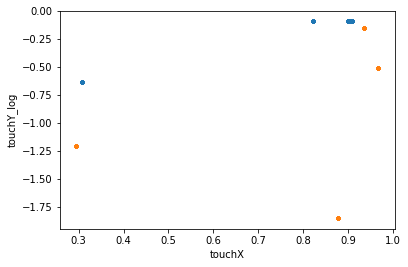

In [36]:
brands_group2 = click_install.groupby(['specs_brand']).size().reset_index().rename(columns={0:'total'})
brands_group2 = brands_group2.loc[brands_group2['total']>0]
for i in range(0,len(brands_group2)):
    sns.regplot(x=click_install.loc[(click_install['specs_brand']==brands_group2.iloc[i]['specs_brand']), ["touchX","touchY_log"]].dropna()["touchX"], \
            y=-click_install.loc[(click_install['specs_brand']==brands_group2.iloc[i]['specs_brand']), ["touchX","touchY_log"]].dropna()["touchY_log"], marker='.',fit_reg=False);
    

    

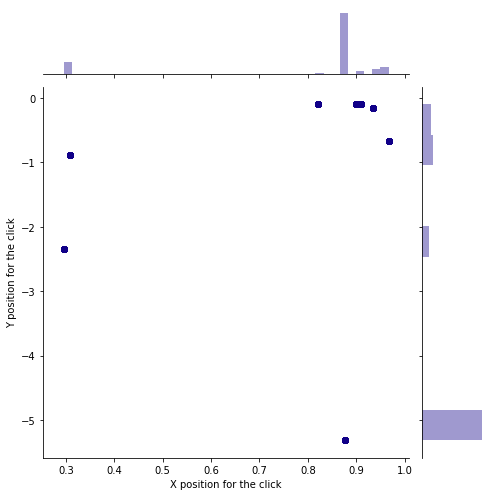

In [185]:
sns.jointplot(x=click_install[["touchX","touchY"]].dropna()["touchX"],y=-click_install[["touchX","touchY"]].dropna()["touchY"], \
              color='#110088', height=7).set_axis_labels('X position for the click', 'Y position for the click');

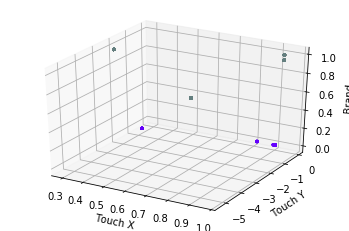

In [37]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tot = len(brands_group2)

for i in range(0,tot):
    
    ax.scatter(click_install.loc[(click_install['specs_brand']==brands_group2.iloc[i]['specs_brand'])]["touchX"],\
               -click_install.loc[(click_install['specs_brand']==brands_group2.iloc[i]['specs_brand'])]["touchY"],
               i, c=hex_color(i,tot), marker='.')

ax.set_xlabel('Touch X')
ax.set_ylabel('Touch Y')
ax.set_zlabel('Brand')

plt.show()



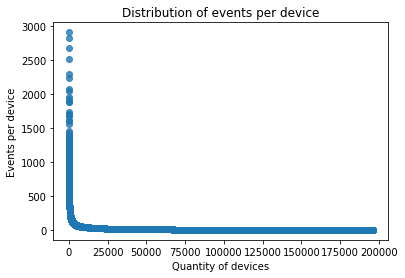

In [193]:
# vamos a graficar la cantidad de events que se tienen por device
#eventsDF['ref_hash'].value_counts().plot.hist(bins=100);
device_freq = eventsDF['ref_hash'].value_counts().to_frame().reset_index().reset_index()
device_freq.columns = ['x', 'ref_hash', 'count']

ax = sns.regplot(x=device_freq['x'], y=device_freq['count'], fit_reg=False);
ax.set_xlabel('Quantity of devices');
ax.set_ylabel('Events per device');
ax.set_title('Distribution of events per device');

El grafico nos muestra que hay muchos devices que tienen muy pocos events y el grafico esta casi mostrando una `L` casi perfecta, para ver si aplica la ley de Zipf aplicaremos log-log plot

/Users/sergiolch/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


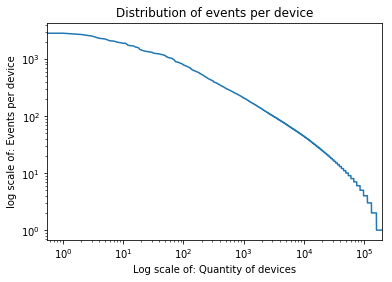

In [196]:
#sns.regplot(x=np.log(device_freq['x'].add(1)), y=np.log(device_freq['count'].add(0.01)), fit_reg=False);
ax = device_freq.plot(x='x',y='count',loglog=True, legend=False);
ax.set_xlabel('Log scale of: Quantity of devices');
ax.set_ylabel('log scale of: Events per device');
ax.set_title('Distribution of events per device');

Se puede ver que el grafico presenta una pendiente negativa. Dado que Ley de potencias=distribucio ́n; Pareto=Distribución acumulada; Zipf=Frecuencia en funcion del Ranking.
entonces se ve que es una **Ley de potencias**


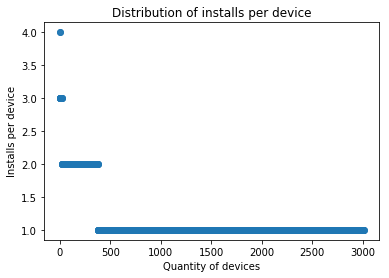

In [197]:
# vamos a graficar la cantidad de installs que se tienen por device
#eventsDF['ref_hash'].value_counts().plot.hist(bins=100);
device_freq2 = installsDF.reset_index()['ref_hash'].value_counts().to_frame().reset_index().reset_index()
device_freq2.columns = ['x', 'ref_hash', 'count']

ax = sns.regplot(x=device_freq2['x'], y=device_freq2['count'], fit_reg=False);
ax.set_xlabel('Quantity of devices');
ax.set_ylabel('Installs per device');
ax.set_title('Distribution of installs per device');

In [199]:
#cuanto se tadró en instalar
display(auctionsDF.head(5).T)
display(installsDF.head(5).T)
tiempo_install = pd.merge(auctionsDF, installsDF, how='inner', left_on='device_id', right_on='ref_hash')



,0,1,2,3,4
auction_type_id,NaN,NaN,NaN,NaN,NaN
country,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
date,2019-03-11 14:18:33.290763,2019-03-11 14:18:34.440157,2019-03-11 14:18:35.862360,2019-03-11 14:18:36.167163,2019-03-11 14:18:37.728590
device_id,6059599345986491085,1115994996230693426,7463856250762200923,7829815350267792040,1448534231953777480
platform,1,1,1,1,1
ref_type_id,1,1,1,1,1
source_id,0,0,0,0,0


ref_hash,8464844987297247076,3250564871270161533,7953318831018100268,7953318831018100268,8355110941557237501
created,2019-03-13 01:43:33.445000,2019-03-13 04:58:35.078000,2019-03-13 04:20:57.666000,2019-03-13 04:20:57.698000,2019-03-10 22:24:56.684000
application_id,0,0,0,0,0
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
click_hash,NaN,NaN,NaN,NaN,NaN
attributed,False,False,False,False,False
implicit,False,False,True,False,True
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_brand,3.083058605577787e+17,3.083058605577787e+17,5.1379920467642125e+17,5.1379920467642125e+17,1.083368711068078e+18
device_model,4.44525e+18,4.44525e+18,6.02654e+18,6.02654e+18,7.87661e+18
user_agent,NaN,NaN,NaN,NaN,NaN


In [200]:
#tiempo desde el auction hasta el install menor a 3 dias
tiempo_install['tiempo_convert'] = tiempo_install['created']-tiempo_install['date']
tiempo_install = tiempo_install.loc[(tiempo_install['tiempo_convert']>'0 days') & (tiempo_install['tiempo_convert']<'3 days')]

In [211]:
tiempo_install['tiempo_convert_int'] = tiempo_install['tiempo_convert'].astype(np.int64)
timpo_promedio = tiempo_install.groupby('device_id').agg({'tiempo_convert_int':'mean'})
timpo_promedio['tiempo_convert'] = pd.to_timedelta(timpo_promedio['tiempo_convert_int'])
timpo_promedio['tiempo_convert_int'] = timpo_promedio['tiempo_convert_int']/(1000000000*60*60) #time in hours
display(timpo_promedio.sort_values(by='tiempo_convert_int').head(5))
display(timpo_promedio.sort_values(by='tiempo_convert_int',ascending=False).head(5))

,tiempo_convert_int,tiempo_convert
device_id,,
4844653152104420856,0.029133,00:01:44.877398
6129964432519467627,0.044369,00:02:39.729453
3776447259165823713,0.056006,00:03:21.621969
2230172337426966295,0.061174,00:03:40.227117
3893665344946125738,0.071200,00:04:16.319738


,tiempo_convert_int,tiempo_convert
device_id,,
1236307184352097085,71.640497,2 days 23:38:25.790681
8429557536069134619,71.120698,2 days 23:07:14.513428
6775546881470313003,71.118304,2 days 23:07:05.892929
5990008676382040117,71.048906,2 days 23:02:56.061636
3713070747538200741,70.786789,2 days 22:47:12.439975


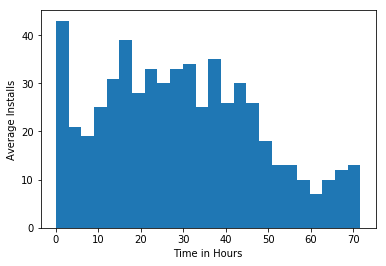

In [218]:
ax = timpo_promedio['tiempo_convert_int'].plot.hist(bins=24);
ax.set_xlabel('Time in Hours');
ax.set_ylabel('Average Installs');

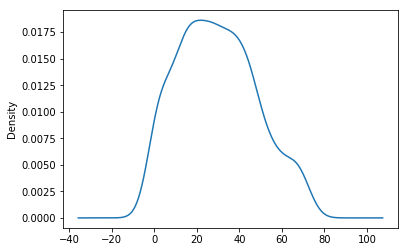

In [220]:
timpo_promedio['tiempo_convert_int'].plot.density();

In [46]:
#cuanto se tadró en instalar
tiempo_event = pd.merge(auctionsDF, eventsDF, how='inner', left_on='device_id', right_on='ref_hash')
tiempo_event.head(5).T

,0,1,2,3,4
auction_type_id,NaN,NaN,NaN,NaN,NaN
country,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
date_x,2019-03-11 14:18:47.603990,2019-03-11 14:18:28.867905,2019-03-11 14:20:56.556871,2019-03-11 14:18:51.095569,2019-03-13 03:49:27.447269
device_id,6306824739731026067,6306824739731026067,6306824739731026067,6306824739731026067,6306824739731026067
platform,1,1,1,1,1
ref_type_id,1,1,1,1,1
source_id,0,0,0,5,5
date_y,2019-03-11 17:04:47.829000,2019-03-11 17:04:47.829000,2019-03-11 17:04:47.829000,2019-03-11 17:04:47.829000,2019-03-11 17:04:47.829000
event_id,22,22,22,22,22
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343


In [47]:
#tiempo desde el auction hasta el install menor a 3 dias
tiempo_event['tiempo_convert'] = tiempo_event['date_x']-tiempo_event['date_y']
tiempo_event = tiempo_event.loc[(tiempo_event['tiempo_convert']>'0 days') & (tiempo_event['tiempo_convert']<'3 days')]

In [48]:
tiempo_event['tiempo_convert_int'] = tiempo_event['tiempo_convert'].astype(np.int64)
timpo_promedio2 = tiempo_event.groupby('device_id').agg({'tiempo_convert_int':'mean'})
timpo_promedio2['tiempo_convert'] = pd.to_timedelta(timpo_promedio2['tiempo_convert_int'])
display(timpo_promedio2.sort_values(by='tiempo_convert_int').head(5))
display(timpo_promedio2.sort_values(by='tiempo_convert_int',ascending=False).head(5))

,tiempo_convert_int,tiempo_convert
device_id,,
6476136897640051683,3.738650e+08,00:00:00.373865
8879285412621886200,3.929860e+08,00:00:00.392986
7726309491409335088,4.065380e+08,00:00:00.406538
8566084026253457341,9.619140e+08,00:00:00.961914
2660291393840202520,1.007727e+09,00:00:01.007727


,tiempo_convert_int,tiempo_convert
device_id,,
2388483969818950144,2.591998e+14,2 days 23:59:59.779375
5384808367700175776,2.591662e+14,2 days 23:59:26.160695
6186960712873908907,2.591471e+14,2 days 23:59:07.120210
4248988661908265614,2.591194e+14,2 days 23:58:39.433272
2506280281326444943,2.591095e+14,2 days 23:58:29.474364


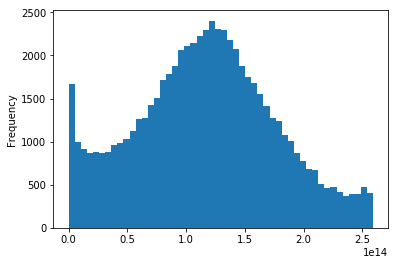

In [49]:
timpo_promedio2['tiempo_convert_int'].plot.hist(bins=50);

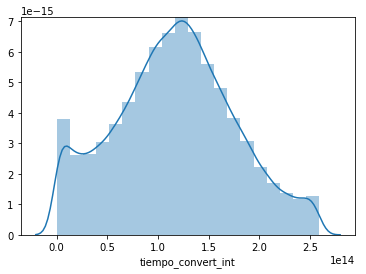

In [50]:
sns.distplot(timpo_promedio2['tiempo_convert_int'], bins=20);

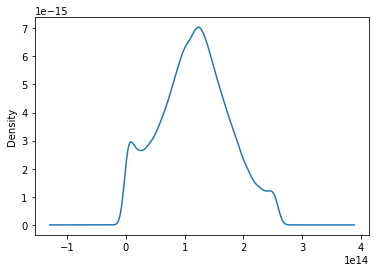

In [51]:
timpo_promedio2['tiempo_convert_int'].plot.density();

In [ ]:
# %%time
# Cuánto tiempo promedio entre publicidades por perfil de usuario se convirtió, cuántos no.
def time_between(x):
    # diferencia entre elementos de la lista
    device_dates = x.dropna().sort_values().tolist();
    if len(device_dates)<2:
        return np.nan
    diff = [j-i for i, j in zip(device_dates[:-1], device_dates[1:])]
    return np.sum(diff)/len(diff)
auctionsDF[['device_id', 'date']].head(2).T
tiempo_entre = auctionsDF.groupby('device_id').agg({'date': time_between})
tiempo_entre['date'].astype(np.int64, inplace=True)
tiempo_entre.to_csv('data/tiempo_entre.csv')
display(tiempo_entre.head(5))

In [52]:
# para no ejecutar el anterior script 2 veces esta en el codigo sigiente
tiempo_entre = pd.read_csv('data/tiempo_entre.csv', index_col='device_id')
tiempo_entre['date'] = pd.to_timedelta(tiempo_entre['date'])

In [53]:
tiempo_entre.describe()

,date
count,1923
mean,0 days 00:07:54.140841
std,0 days 00:09:35.499620
min,0 days 00:00:00.006781
25%,0 days 00:01:15.191176
50%,0 days 00:04:21.769474
75%,0 days 00:10:34.330056
max,0 days 00:52:42.660945


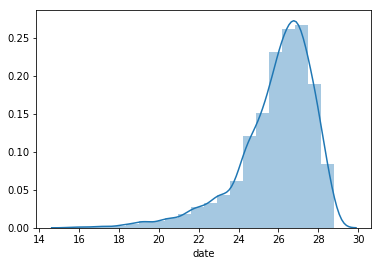

In [54]:
sns.distplot(np.log(tiempo_entre['date'].dropna().astype(np.int64).add(1)), bins=20);

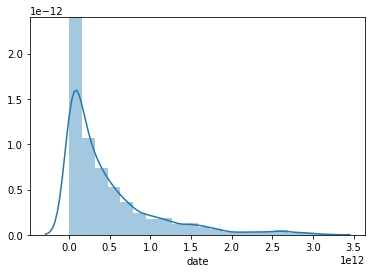

In [55]:
sns.distplot(tiempo_entre['date'].dropna().astype(np.int64), bins=20);

In [57]:
#cuanto se tadró en convertir
tiempo_convert = tiempo_event[['device_id','tiempo_convert']].append(tiempo_install[['device_id','tiempo_convert']])
tiempo_convert['tiempo_convert_int'] = tiempo_convert['tiempo_convert'].astype(np.int64)
timpo_promedio_final = tiempo_convert.groupby('device_id').agg({'tiempo_convert_int':'mean'})
timpo_promedio_final['tiempo_convert'] = pd.to_timedelta(timpo_promedio_final['tiempo_convert_int'])
display(timpo_promedio_final.sort_values(by='tiempo_convert_int').head(5))
display(timpo_promedio_final.sort_values(by='tiempo_convert_int',ascending=False).head(5))

,tiempo_convert_int,tiempo_convert
device_id,,
6476136897640051683,3.738650e+08,00:00:00.373865
8879285412621886200,3.929860e+08,00:00:00.392986
7726309491409335088,4.065380e+08,00:00:00.406538
2660291393840202520,1.007727e+09,00:00:01.007727
1060905180031510488,1.388022e+09,00:00:01.388022


,tiempo_convert_int,tiempo_convert
device_id,,
2388483969818950144,2.591998e+14,2 days 23:59:59.779375
5384808367700175776,2.591662e+14,2 days 23:59:26.160695
6186960712873908907,2.591471e+14,2 days 23:59:07.120210
4248988661908265614,2.591194e+14,2 days 23:58:39.433272
2506280281326444943,2.591095e+14,2 days 23:58:29.474364


In [142]:
timpo_promedio_final['tiempo_convert'].describe()

count                     64129
mean     1 days 08:18:03.241788
std      0 days 16:31:56.341358
min      0 days 00:00:00.373865
25%      0 days 20:54:53.277348
50%      1 days 08:33:51.973624
75%      1 days 19:20:11.183846
max      2 days 23:59:59.779375
Name: tiempo_convert, dtype: object

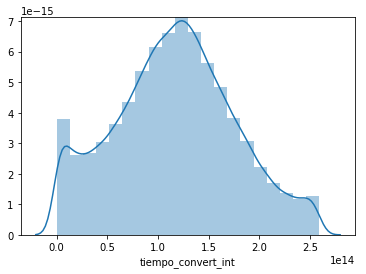

In [58]:
sns.distplot(timpo_promedio_final['tiempo_convert_int'], bins=20);

In [109]:
from datetime import timedelta
# date-timedelta(hours=3) -> es la hora de argentina
eventsDF['hora'] = (eventsDF['date']-timedelta(hours=3)).apply(lambda x: ('%02d:00' % x.hour))
eventsDF['dia'] = (eventsDF['date']-timedelta(hours=3)).apply(lambda x: x.day_name()+' '+str(x.day))

In [144]:
#agrupar por dia y hora
dia_hora = eventsDF.groupby(['dia','hora']).size().reset_index()
dia_hora.columns = ['dia','hora', 'count']
#tabla pivote de hora vs dia
dia_hora = dia_hora.pivot_table(index='hora', columns='dia', values='count',aggfunc='sum', fill_value=0, dropna=False)

In [145]:
#reordenar columnas
dia_hora = dia_hora[['Monday 4','Tuesday 5', 'Wednesday 6', 'Thursday 7', 'Friday 8', 'Saturday 9', 'Sunday 10', 'Monday 11', 'Tuesday 12', 'Wednesday 13']]
display(dia_hora)

dia,Monday 4,Tuesday 5,Wednesday 6,Thursday 7,Friday 8,Saturday 9,Sunday 10,Monday 11,Tuesday 12,Wednesday 13
hora,,,,,,,,,,
00:00,0,12110,11104,11240,11611,12692,12929,10187,9793,10803
01:00,0,8225,7995,6789,6286,9531,10394,7767,5964,6076
02:00,0,5437,5411,4128,4547,6824,8166,4058,3780,4610
03:00,0,3333,3361,2593,2945,4067,6868,3548,2509,3071
04:00,0,2571,2485,1800,2230,3437,4674,2836,1609,1981
05:00,0,2196,2178,2566,2106,3864,4129,2780,1905,2352
06:00,0,2536,3302,3240,3398,4232,3889,3866,3685,4751
07:00,0,3117,5583,5077,5545,4881,4041,6896,7146,15958
08:00,0,5036,7848,7286,8873,6881,4987,9161,10684,22132


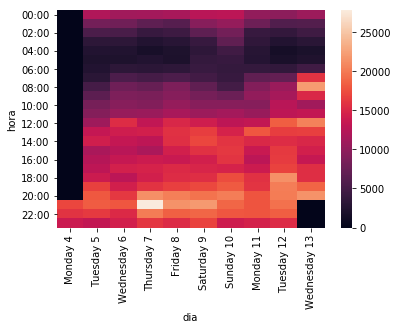

In [148]:
sns.heatmap(dia_hora);